# Group Project

## Data:

The data is about University Rankings across the world in 2023. It consists of 2342 rows corresponding to 1799 universities across 104 countries and regions and 13 features. The features are determined based on 4 popular performance indicators of an institution: teaching, research, knowledge transfer and international outlook. The data is collected through 121 million citations of 15.5 million research publications and a survey conducted on 40,000 scholars worldwide. The features include:
1. `University Rank`: Rank of the university (chr)
2. `Name of University`: Name of the university (chr)
3. `Location`: Country or region the university is located (chr)
4. `No of student `: Number of students enrolled in the university currently (chr)
5. `No of student per staff`: Number of students per one professor (dbl)
6. `International Student`: Number of international students (chr)
7. `Female : Male Ratio`: Ratio of female : male (chr)
8. `OverAll Score`: University overall score out of 100 (chr)
9. `Teaching`: Rating of teaching score out of 100 (chr)
10. `Research Score`: Rating of research (chr) 
11. `Citations Score`: Number of citations received by a journal in one year divided by number of documents published in the three previous years (chr)
12. `Industry Income Score`: How much money a university receives from the industry in return for its academic expertise (chr)
13. `International Outlook Score`: The ability of a university to attract undergraduates, postgraduates and faculty comparing to other universities around the world (chr) <br>

It is also necessary to mention a cleaned version of this dataset. The updates include assigning missing values with "Unknown", one hot encoding for `Name of University` and `Location` columns, seperating  Female : Male Ratio into `Female Ratio` and `Male Ratio` columns, dividing `OverAll Score` into `OverAll Score Min` and `OverAll Score Max` columns, and converting all related columns(`Female Ratio`, `Male Ratio`, `OverAll Score Min`, `OverAll Score Max`, `No of Student`, and `International Student`) into numerical type. The clean dataset will be of use for data analysis and machine learning modelling especially predictive model.

## Data Cleaning/Wrangling:

The following are libraries that are essential for the model to be created.

In [1]:
install.packages("viridis")
install.packages("mice")
library(tidyverse)
library(broom)
library(cowplot)
library(reshape2)
library(viridis)
library(rsample)
library(glmnet)
library(mice)
theme_set(theme_bw())
options(repr.plot.width = 12, repr.plot.height =10)

Installing package into 'C:/Users/ASUS/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'viridis' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ASUS\AppData\Local\Temp\Rtmp6FPnYx\downloaded_packages


Installing package into 'C:/Users/ASUS/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'mice' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ASUS\AppData\Local\Temp\Rtmp6FPnYx\downloaded_packages


Warning message:
"package 'tidyverse' was built under R version 4.2.3"
Warning message:
"package 'ggplot2' was built under R version 4.2.3"
Warning message:
"package 'tibble' was built under R version 4.2.3"
Warning message:
"package 'tidyr' was built under R version 4.2.3"
Warning message:
"package 'readr' was built under R version 4.2.3"
Warning message:
"package 'purrr' was built under R version 4.2.3"
Warning message:
"package 'dplyr' was built under R version 4.2.3"
Warning message:
"package 'forcats' was built under R version 4.2.3"
Warning message:
"package 'lubridate' was built under R version 4.2.3"
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()

Next, I will use read.csv() to read the dataset, and head() to get a first view of the dataset.


In [2]:
df <- read.csv("https://raw.githubusercontent.com/RayNguyent/STAT301-project/main/data/World%20University%20Rankings%202023-preprocessed.csv")

In [3]:
head(df)

,No.of.student,No.of.student.per.staff,International.Student,Teaching.Score,Research.Score,Citations.Score,Industry.Income.Score,International.Outlook.Score,Female.Ratio,Male.Ratio,⋯,Location_United.Kingdom,Location_United.States,Location_Unknown.Location,Location_Uruguay,Location_Uzbekistan,Location_Venezuela,Location_Vietnam,Location_Zambia,Location_Zimbabwe,University.Rank
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,20965,10.6,0.42,92.3,99.7,99.0,74.9,96.2,48,52,⋯,1,0,0,0,0,0,0,0,0,1
2,21887,9.6,0.25,94.8,99.0,99.3,49.5,80.5,50,50,⋯,0,1,0,0,0,0,0,0,0,2
3,20185,11.3,0.39,90.9,99.5,97.0,54.2,95.8,47,53,⋯,1,0,0,0,0,0,0,0,0,3
4,16164,7.1,0.24,94.2,96.7,99.8,65.0,79.8,46,54,⋯,0,1,0,0,0,0,0,0,0,3
5,11415,8.2,0.33,90.7,93.6,99.8,90.9,89.3,40,60,⋯,0,1,0,0,0,0,0,0,0,5
6,2237,6.2,0.34,90.9,97.0,97.3,89.8,83.6,37,63,⋯,0,1,0,0,0,0,0,0,0,6


Next, I renamed the columns of the dataset to a better format.

In [5]:
df <- df %>%
    select(University.Rank, No.of.student, No.of.student.per.staff, International.Student, Teaching.Score, Research.Score, Citations.Score,
          Industry.Income.Score, International.Outlook.Score, Female.Ratio, Male.Ratio, OverAll.Score.Min, OverAll.Score.Max)

head(df)

,University.Rank,No.of.student,No.of.student.per.staff,International.Student,Teaching.Score,Research.Score,Citations.Score,Industry.Income.Score,International.Outlook.Score,Female.Ratio,Male.Ratio,OverAll.Score.Min,OverAll.Score.Max
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,20965,10.6,0.42,92.3,99.7,99.0,74.9,96.2,48,52,96.4,96.4
2,2,21887,9.6,0.25,94.8,99.0,99.3,49.5,80.5,50,50,95.2,95.2
3,3,20185,11.3,0.39,90.9,99.5,97.0,54.2,95.8,47,53,94.8,94.8
4,3,16164,7.1,0.24,94.2,96.7,99.8,65.0,79.8,46,54,94.8,94.8
5,5,11415,8.2,0.33,90.7,93.6,99.8,90.9,89.3,40,60,94.2,94.2
6,6,2237,6.2,0.34,90.9,97.0,97.3,89.8,83.6,37,63,94.1,94.1


In [6]:
names(df) <- c('university_rank','Num_student','No_of_student_per_staff','International_student','Teaching_score','Research_score','Citations_score','Industry_income_score','International_outlook_score',"Female_ratio","Male_ratio","Overall_score_min","Overall_score_max")

I noticed `Num_student` column is formatted as `,` instead of `.`, so I used `gsub()` to replace `,` with`.` The same applied to `Internation_student` where I got rid of `%`, then divided the values by 100(next code cell).

In [8]:
df <- df %>% mutate_at(c ('university_rank','Num_student', 'International_student','No_of_student_per_staff','Teaching_score',
                          'Research_score','Industry_income_score','Citations_score','International_outlook_score'), as.double)

Warning message:
"There was 1 warning in `mutate()`.
ℹ In argument: `university_rank = .Primitive("as.double")(university_rank)`.
Caused by warning:
! NAs introduced by coercion"


In [9]:
df <- df %>% drop_na(International_outlook_score)

In [13]:
data.frame(sapply(df, function(x) sum(is.na(x))))

,sapply.df..function.x..sum.is.na.x...
,<int>
university_rank,2142
Num_student,0
No_of_student_per_staff,0
International_student,0
Teaching_score,0
Research_score,0
Citations_score,0
Industry_income_score,0
International_outlook_score,0


## EDA

Hard to tell for this one. The points are highly clustered around the lower end of the range but there could still be a relationship for the majority of points. Still there doesn't really seem to be a relationship at first glance, indicating that the number of students and the student to staff ratio might not be too important to keep.

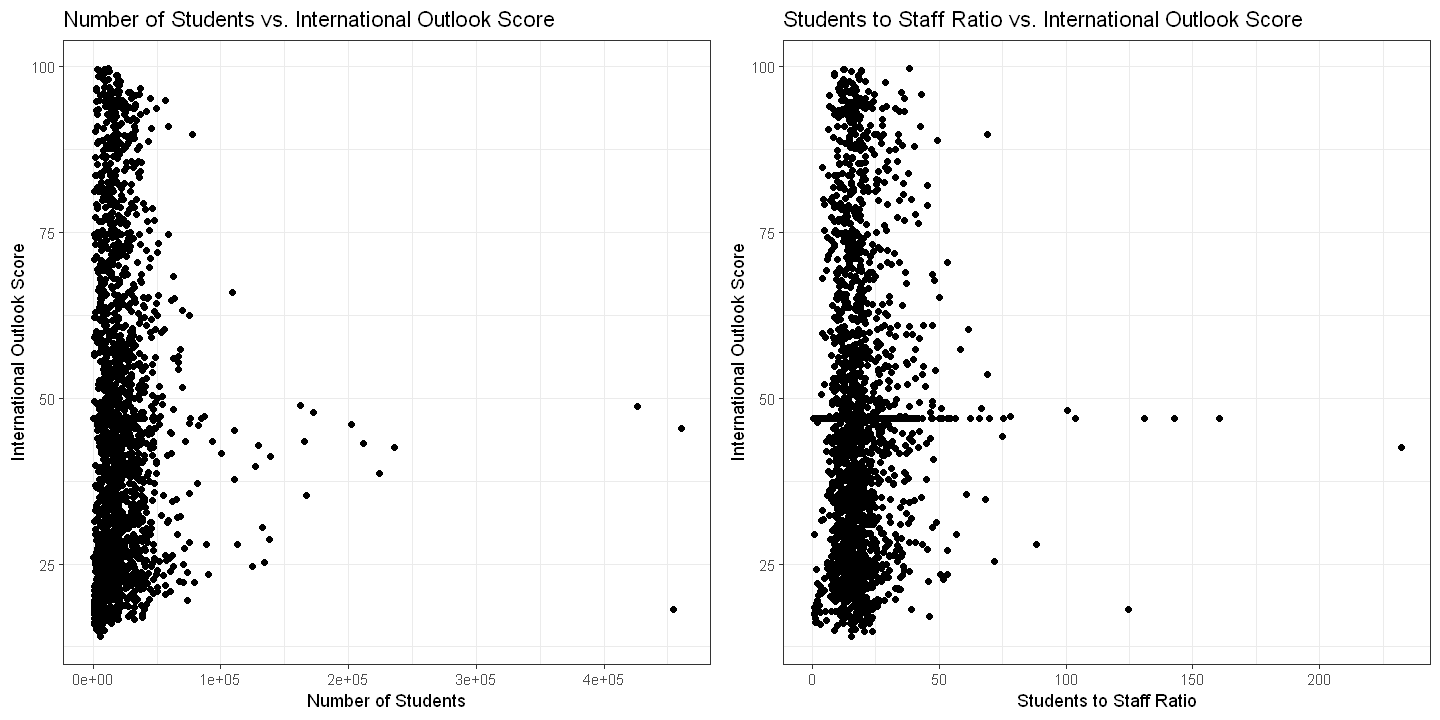

In [18]:
options(repr.plot.width= 12, repr.plot.height=6)

plot_2 <- df %>%
    ggplot(aes(x = Num_student, y = International_outlook_score)) + 
    geom_point() +
    xlab("Number of Students") +
    ylab("International Outlook Score") +
    ggtitle("Number of Students vs. International Outlook Score")

plot_3 <- df %>%
    ggplot(aes(x = No_of_student_per_staff, y = International_outlook_score)) + 
    geom_point() +
    xlab("Students to Staff Ratio") +
    ylab("International Outlook Score") +
    ggtitle("Students to Staff Ratio vs. International Outlook Score")

plot_grid(plot_2, plot_3)
                                                                                        

Now here's a scatter plot that seems to suggest a relationship between the number of international score and and the % of international students. There are a few odd-values that form a line, though that is due to the imputed values and are probably not actually significant to the relationship. Regardless, it seems that keeping the % of Internation Students feature would be a smart idea.


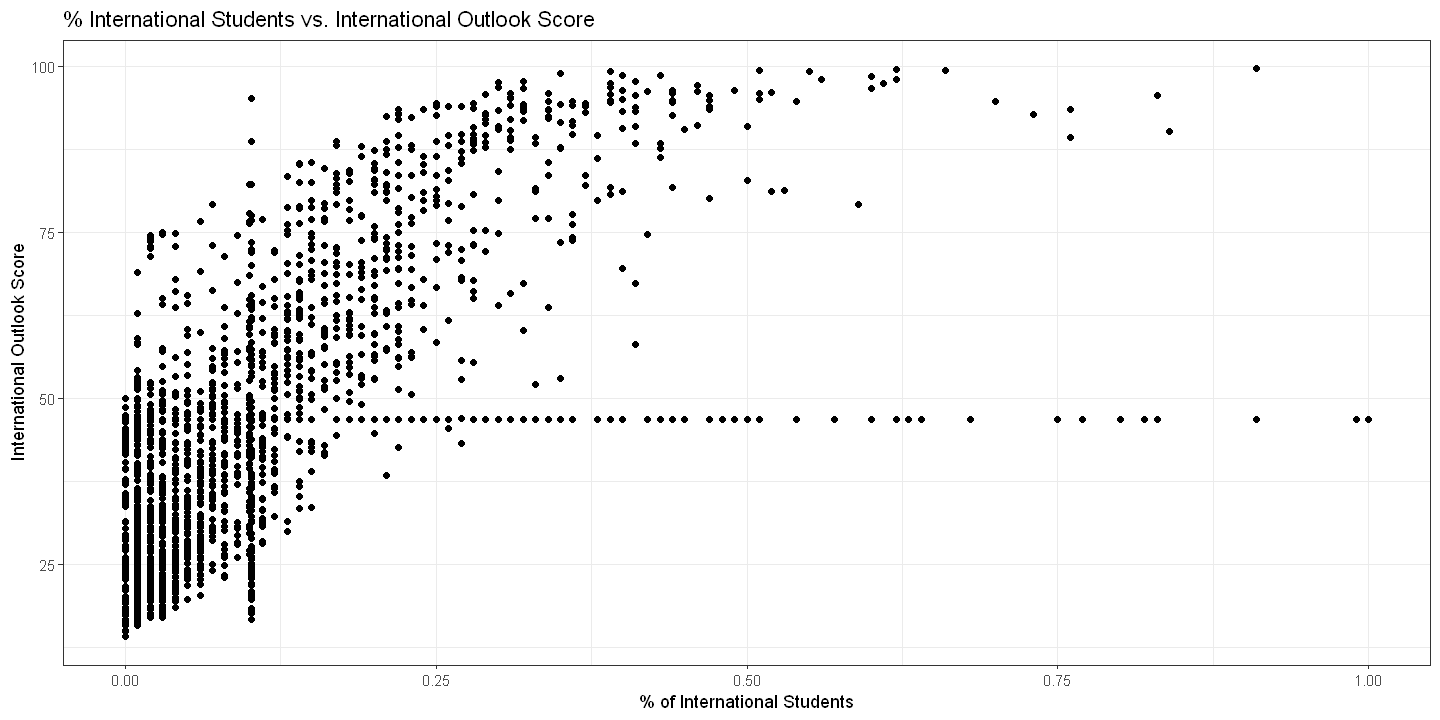

In [20]:
options(repr.plot.width= 12, repr.plot.height=6)

plot_4 <- df %>%
    ggplot(aes(x = International_student, y = International_outlook_score)) + 
    geom_point() +
    xlab("% of International Students") +
    ylab("International Outlook Score") +
    ggtitle("% International Students vs. International Outlook Score")

plot_4

All of the plots below seem to have a vaugue relationship to our target feature, some more than others. Regardless, while the relationships are not super strong, the various scoring features do seem relevent to creating a predictive model.

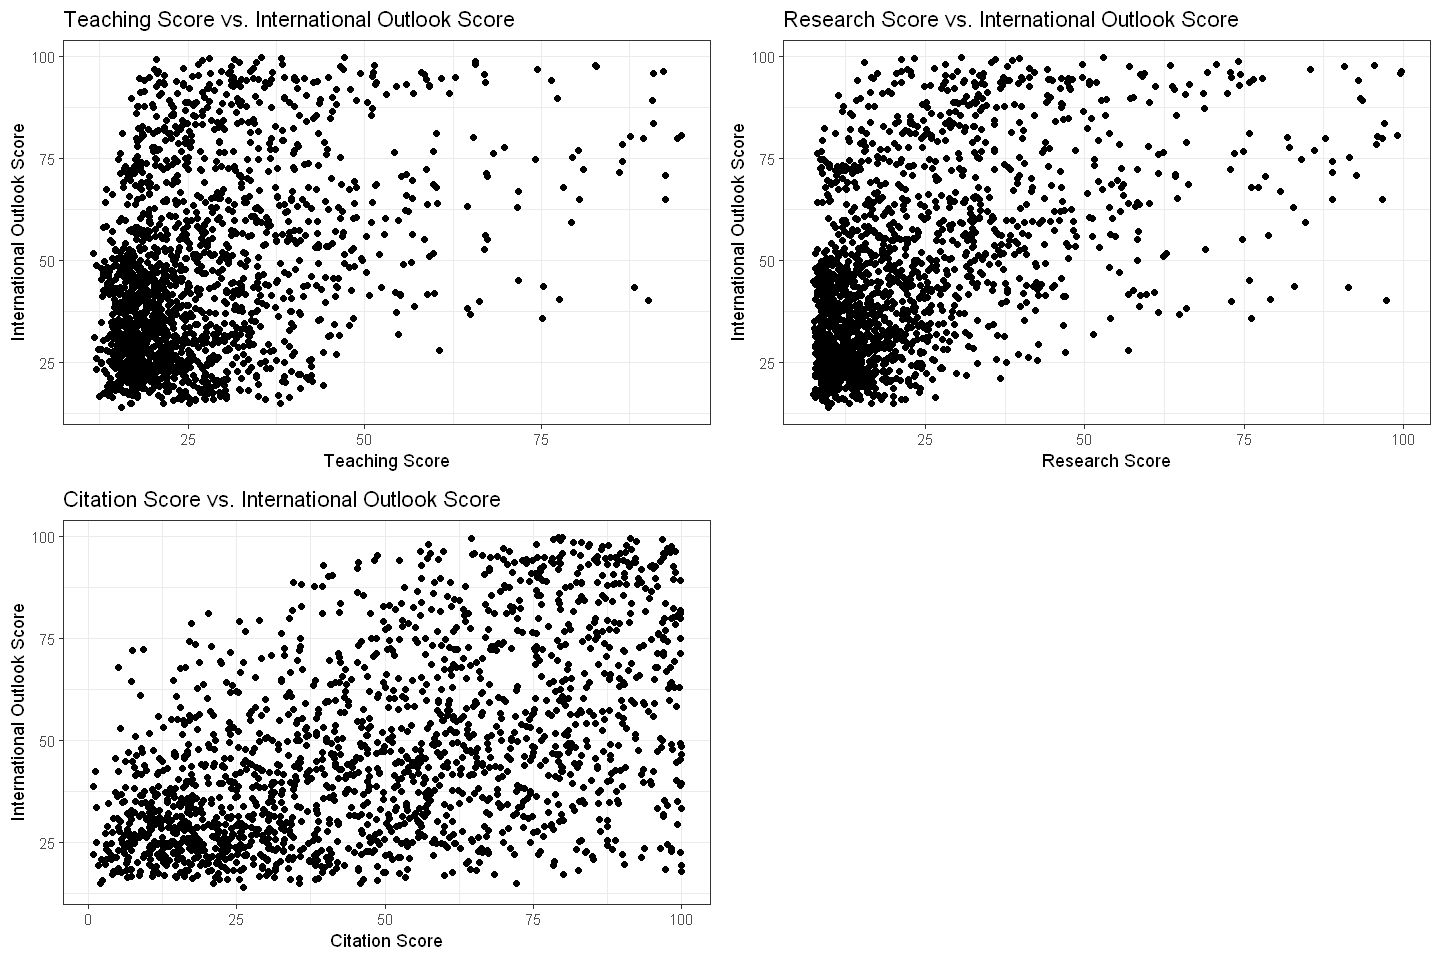

In [23]:
options(repr.plot.width= 12, repr.plot.height= 8)

plot_5 <- df%>%
    ggplot(aes(x = Teaching_score, y = International_outlook_score)) + 
    geom_point() +
    xlab("Teaching Score") +
    ylab("International Outlook Score") +
    ggtitle("Teaching Score vs. International Outlook Score")

plot_6 <- df %>%
    ggplot(aes(x = Research_score, y = International_outlook_score)) + 
    geom_point() +
    xlab("Research Score") +
    ylab("International Outlook Score") +
    ggtitle("Research Score vs. International Outlook Score")

plot_7 <- df %>%
    ggplot(aes(x = Citations_score, y = International_outlook_score)) + 
    geom_point() +
    xlab("Citation Score") +
    ylab("International Outlook Score") +
    ggtitle("Citation Score vs. International Outlook Score")

plot_grid(plot_5, plot_6, plot_7)

There is no significant pattern to be observed for Industry income score versus International outlook score. The Industry Income Score doesn't seem to have any relationship to the International Outlook Score; however, it is still a potential feature in predicting the international outlook score.

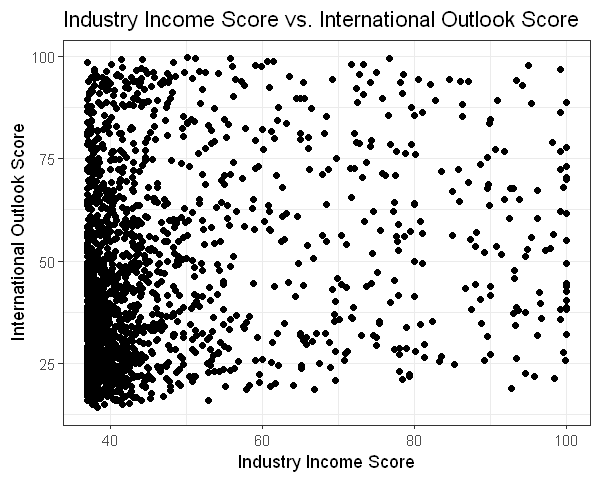

In [25]:
options(repr.plot.width= 5, repr.plot.height=4)

plot_8 <- df%>%
    ggplot(aes(x = Industry_income_score, y = International_outlook_score)) + 
    geom_point() +
    xlab("Industry Income Score") +
    ylab("International Outlook Score") +
    ggtitle("Industry Income Score vs. International Outlook Score")

plot_8

With these features being mirrors of each other, pulling them apart doesn't really seem useful. In terms of their relationship to the international outlook score it seem as though neither of them have a defined relationship to our target, so they might not be super relevent to our prospective predictive model.

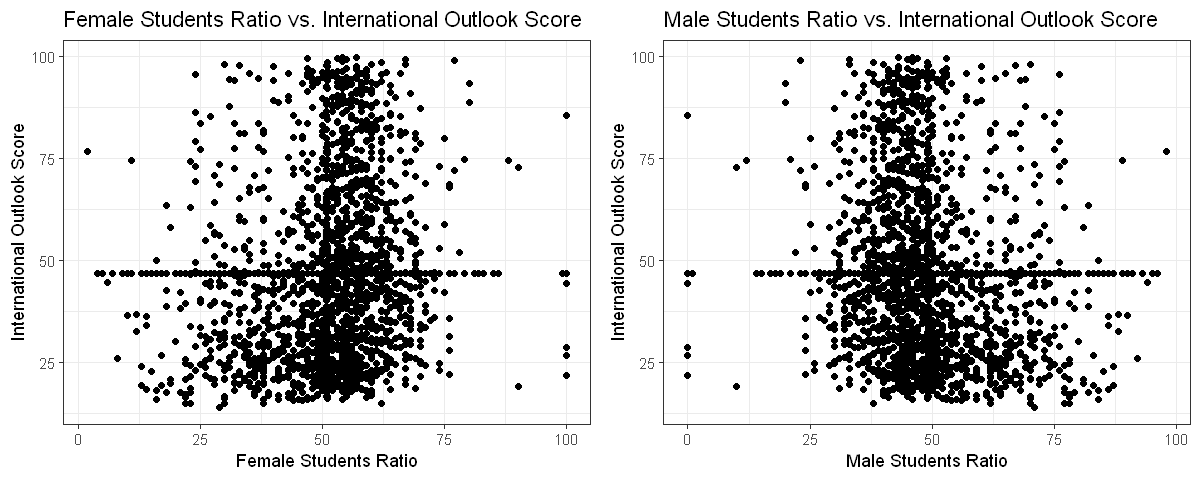

In [26]:
options(repr.plot.width= 10, repr.plot.height=6)

plot_9 <- df%>%
    ggplot(aes(x = Female_ratio, y = International_outlook_score)) + 
    geom_point() +
    xlab("Female Students Ratio") +
    ylab("International Outlook Score") +
    ggtitle("Female Students Ratio vs. International Outlook Score")

plot_10 <- df %>%
    ggplot(aes(x = Male_ratio, y = International_outlook_score)) + 
    geom_point() +
    xlab("Male Students Ratio") +
    ylab("International Outlook Score") +
    ggtitle("Male Students Ratio vs. International Outlook Score")

plot_grid(plot_9,plot_10)

There does seem to be a relatively linear relationship in the case of overall score to the international outlook score. I would imagine that is due to the fomer being in part calculated with the ladder, but regardless the relationship does seem to be relevant there. There is a slight issue to how many imputed values are introduced into the data making this relationship seem a bit rocky, but it doesn't seem like too much of streach to assume that the overall score would be useful in some predictive model.

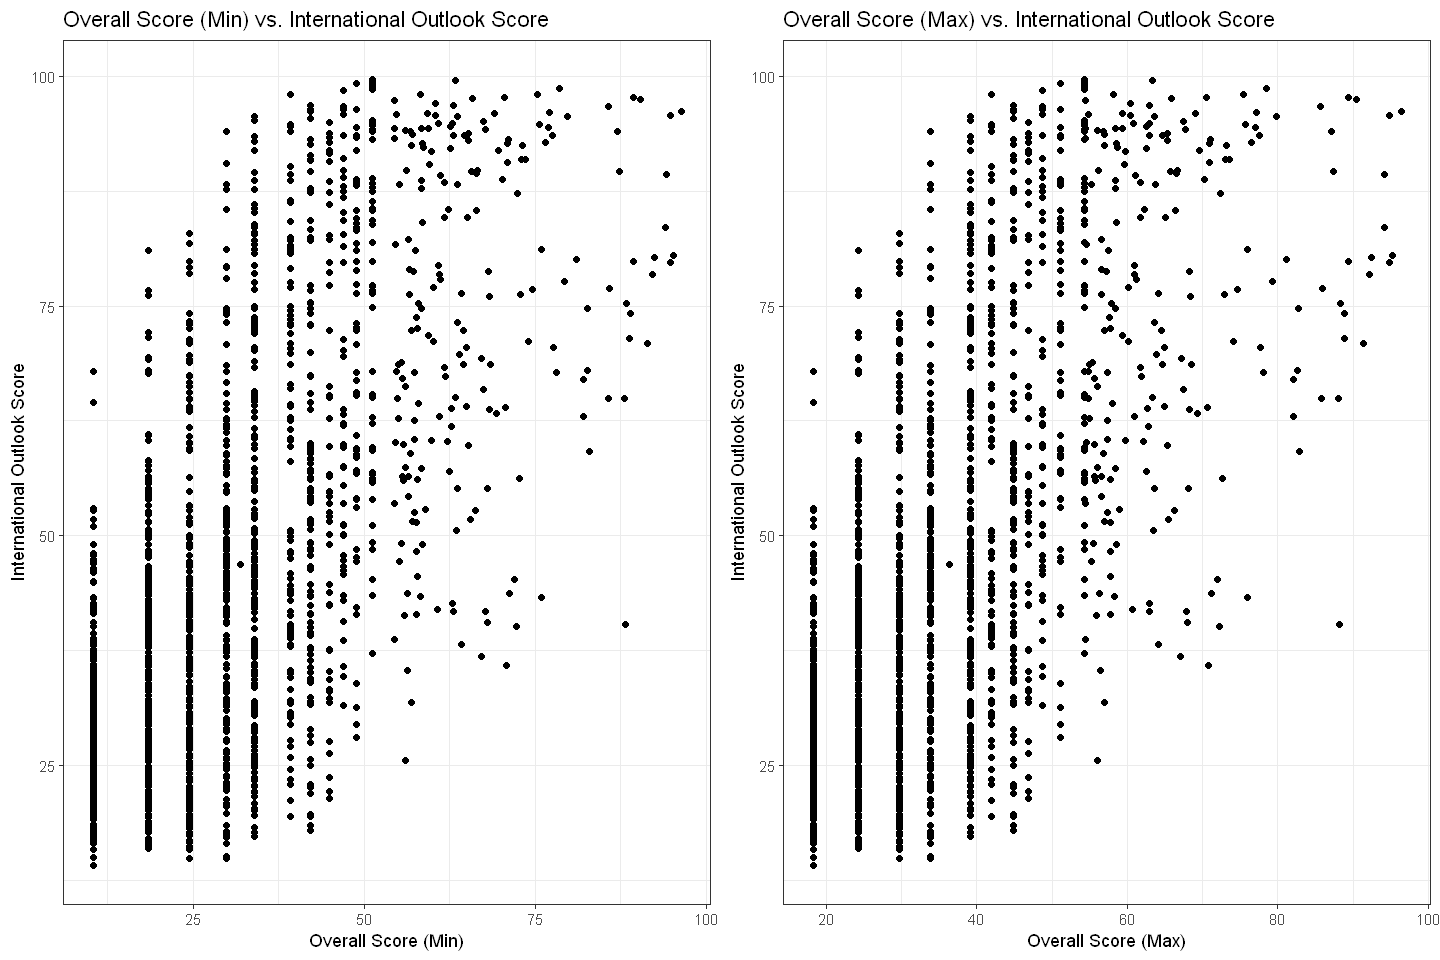

In [31]:
options(repr.plot.width= 12, repr.plot.height=8)

plot_11 <- df%>%
    ggplot(aes(x = Overall_score_min, y = International_outlook_score)) + 
    geom_point()+
    xlab("Overall Score (Min)") +
    ylab("International Outlook Score") +
    ggtitle("Overall Score (Min) vs. International Outlook Score")

plot_12 <- df %>%
    ggplot(aes(x = Overall_score_max, y = International_outlook_score)) + 
    geom_point()+
    xlab("Overall Score (Max)") +
    ylab("International Outlook Score") +
    ggtitle("Overall Score (Max) vs. International Outlook Score")

plot_grid(plot_11, plot_12)

This is a heatmap of correlations between all the scores including `International_outlook_score`(y), target value. A heatmap will indicate if the scores are linearly correlated with y, which helps decide whether we should keep the variables for the linear model. The plot demonstrates a fairly high positive correlation, 0.54, between `Citations_score`, `Research_score` and y. The least correlated explanatory variable is `Industry_income_score` with a value of 0.22. It is worth noting that `Research_score` and `Teaching_score` are highly correlated producing a correlated coefficient of 0.88. We will have to conduct further analysis into these two variables to avoid collinearity when training the model. 

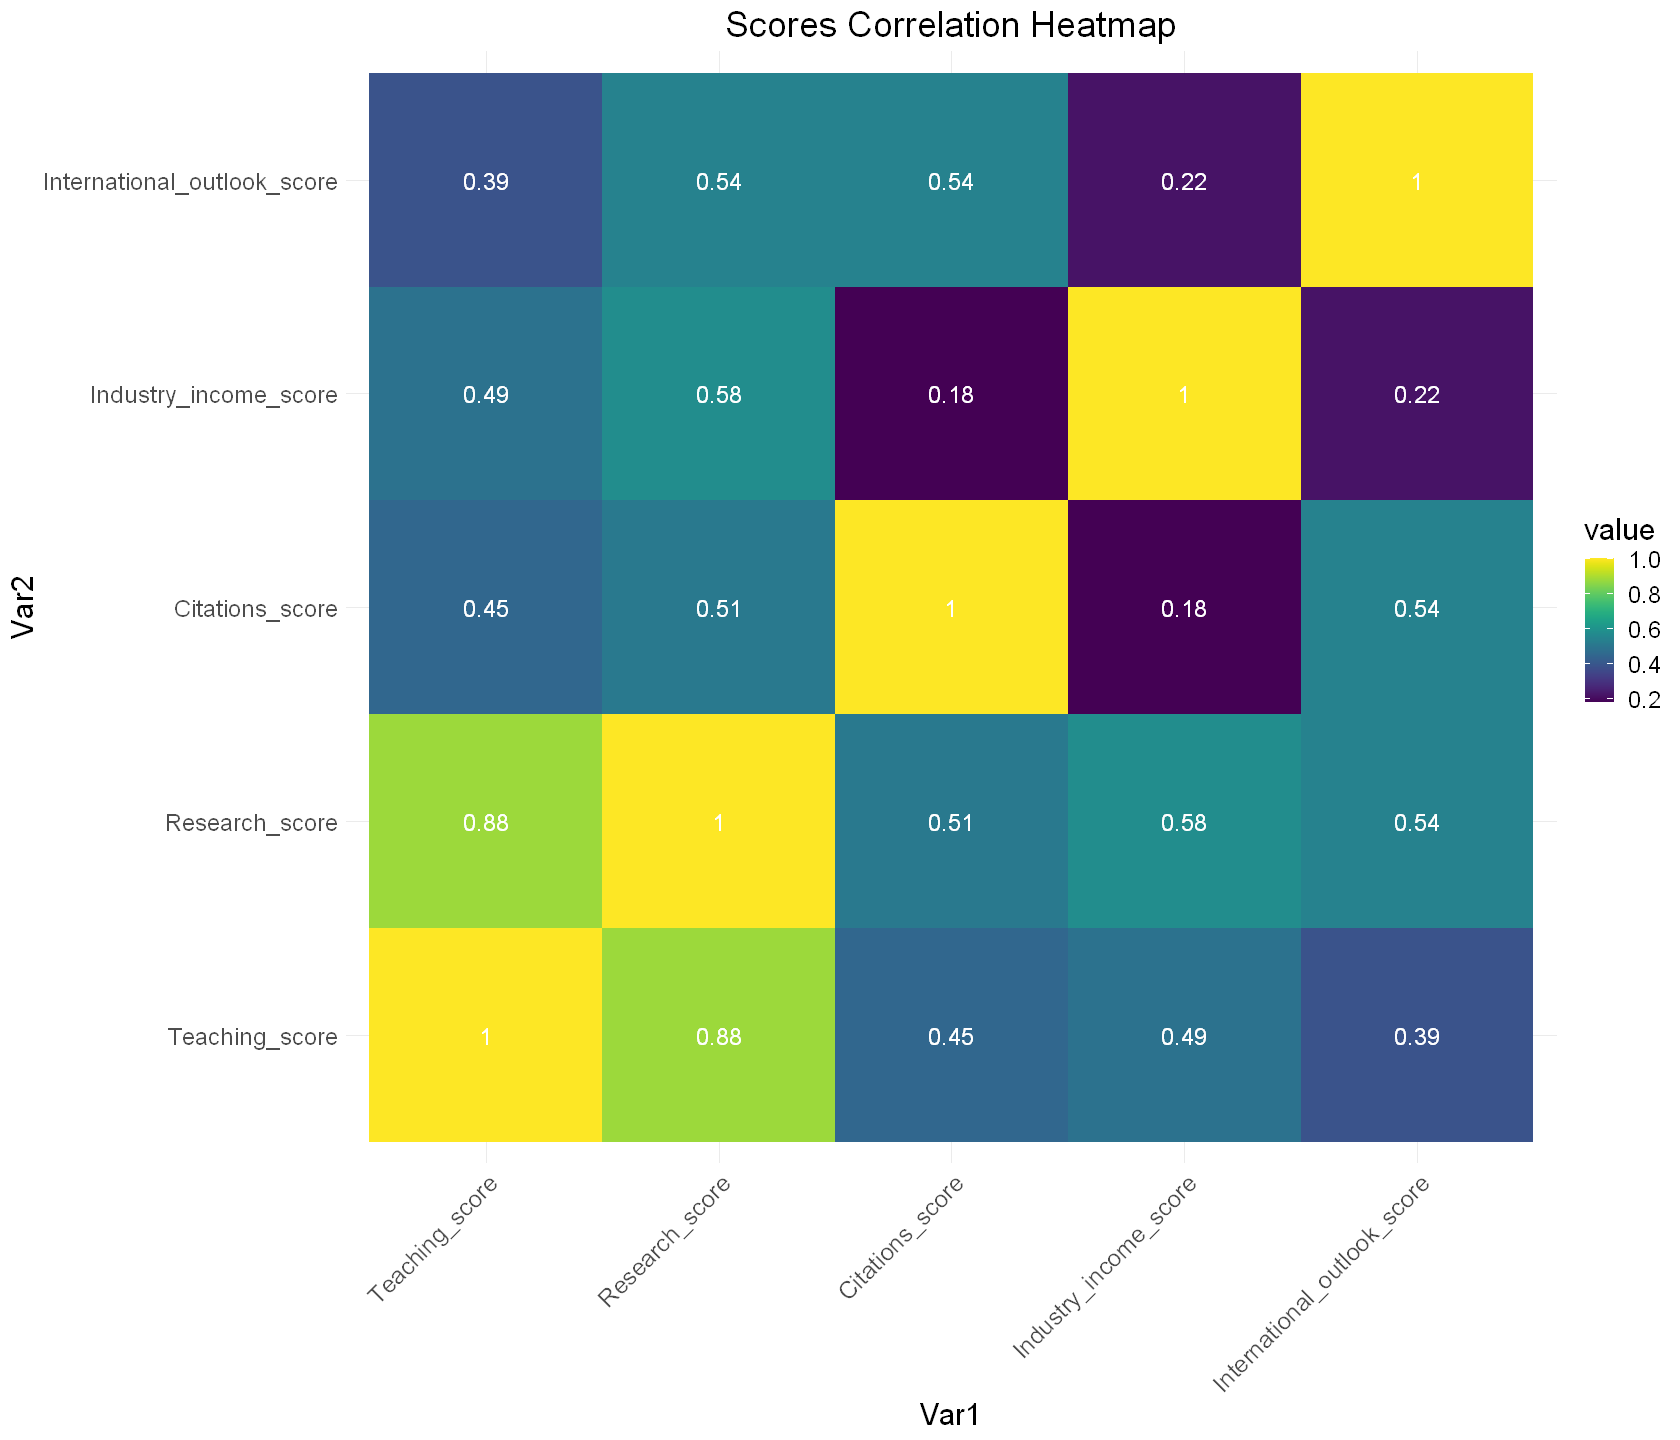

In [24]:
options(repr.plot.width = 14, repr.plot.height =12)
df_scores = df %>% select(Teaching_score, Research_score, Citations_score, Industry_income_score, International_outlook_score)
corr<- round(cor(df_scores),2)
melted_corr<- melt(corr)
ggplot(data = melted_corr, aes(x=Var1, y=Var2,
                                   fill=value)) + geom_tile() +
  theme_minimal() + theme(axis.text.x = element_text(angle = 45, hjust = 1)) +  
  labs(title = "Scores Correlation Heatmap") + geom_text(aes(Var2, Var1, label = value), 
          color = "white", size = 5) + scale_fill_viridis() +
  theme(plot.title = element_text(hjust = 0.5),text = element_text(size=18))

## Reference:

Syed Ali Taqi. (2023). <i>World University Rankings 2023</i> [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/6394958 <br>
https://www.kaggle.com/datasets/samiatisha/world-university-rankings-2023-clean-dataset